# 1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [312]:
import pandas as pd
df = pd.read_csv('fatal-police-shootings-data.csv')

In [313]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# 2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [314]:
import numpy as np
df1=df.pivot_table(values='name',index='race',columns='signs_of_mental_illness',aggfunc=len)
df1

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


# 3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [315]:
df1.columns =['False', 'True']

In [316]:
def percent_of_mental(row):
     return row['True']/(row['True']+row['False'])

In [317]:
df1['Signs of Mental Illness Percent'] = df1.apply(lambda row: percent_of_mental(row),axis=1).round(2)

In [318]:
df1.sort_values(by='Signs of Mental Illness Percent', ascending=False)

,False,True,Signs of Mental Illness Percent
race,,,
W,1763,713,0.29
A,69,24,0.26
O,37,11,0.23
N,64,14,0.18
H,745,157,0.17
B,1114,184,0.14


# 4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [319]:
df['date'] = pd.to_datetime(df['date'])
df['day']=df['date'].dt.day_name()

In [320]:
df['day'].value_counts()

Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: day, dtype: int64

In [321]:
df['day']=pd.Categorical(df['day'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

In [322]:
df_plot=df['day'].value_counts().sort_index()

Text(0, 0.5, 'Interventions')

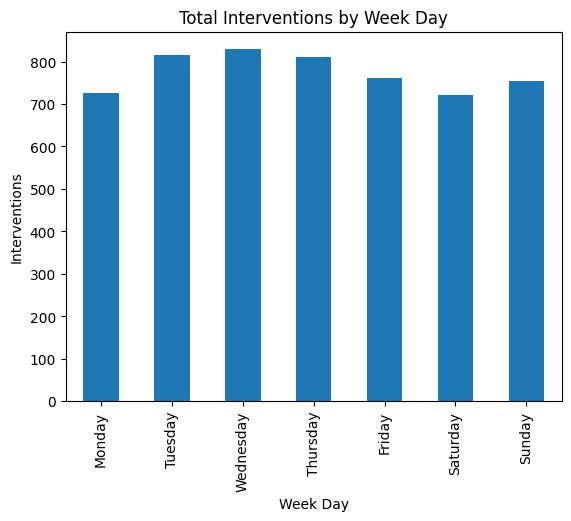

In [323]:
my_plot = df_plot.plot(kind='bar',legend=None,title="Total Interventions by Week Day")
my_plot.set_xlabel("Week Day")
my_plot.set_ylabel("Interventions")

# 5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [324]:
data1=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
data2=pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)

In [325]:
population=data1[0]
codes=data2[0]

In [326]:
codes.rename(columns={ codes.columns[0]: 'state_name', codes.columns[5]: 'state'}, inplace = True)

In [327]:
codes=codes[['state_name', 'state']]

In [328]:
population.rename(columns={ population.columns[2]: 'state_name', population.columns[3]: 'population'}, inplace = True)

In [329]:
population=population[['state_name', 'population']]

In [330]:
right=pd.merge(population,codes,how='inner',on='state_name')

In [331]:
df=pd.merge(df,right,how='inner',on='state')

In [332]:
table_per_1000=df.pivot_table(values='name',index=['state_name', 'population'], aggfunc=len).reset_index()

In [333]:
table_per_1000.rename(columns={table_per_1000.columns[2]: 'interventions'}, inplace = True)
table_per_1000

,state_name,population,interventions
0,Alabama,4903185,104
1,Alaska,731545,39
2,Arizona,7278717,254
3,Arkansas,3017825,83
4,California,39512223,799
5,Colorado,5758736,195
6,Connecticut,3565287,21
7,Delaware,973764,13
8,District of Columbia,705749,13
9,Florida,19453561,350


In [334]:
def interventions_per_1000(row):
     return row['interventions']/(0.001*row['population'])

In [335]:
table_per_1000['Interventions per 1000'] = table_per_1000.apply(lambda row: interventions_per_1000(row),axis=1).round(2)

In [336]:
table_per_1000

,state_name,population,interventions,Interventions per 1000
0,Alabama,4903185,104,0.02
1,Alaska,731545,39,0.05
2,Arizona,7278717,254,0.03
3,Arkansas,3017825,83,0.03
4,California,39512223,799,0.02
5,Colorado,5758736,195,0.03
6,Connecticut,3565287,21,0.01
7,Delaware,973764,13,0.01
8,District of Columbia,705749,13,0.02
9,Florida,19453561,350,0.02
